学籍番号:202421695
氏名:松本寛智

## 1. 共分散行列
データ共分散行列の一致性を検証するために，サンプルサイズが増えていった時の推定誤差を検証せよ．  
誤差は要素毎の差の絶対値を全ての要素について最大を取ったものとする．

In [ ]:
!pip install japanize-matplotlib

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import japanize_matplotlib

In [3]:
mu = np.zeros(2)  # 平均ベクトル
D = np.diag([1.0, 0.5])  # 固有値
rot = np.pi / 6.0  # 回転角
U = np.array([[np.cos(rot), np.sin(rot)], [-np.sin(rot), np.cos(rot)]])  # 固有ベクトル（回転ベクトル）
Cov = U @ D @ U.T  # 共分散行列

In [4]:
r_true = Cov[0, 1] / np.sqrt(Cov[0, 0] * Cov[1, 1])
print(r_true)

-0.29277002188455986


### 結果

In [5]:
mydata = stats.multivariate_normal.rvs(mean=mu, cov=Cov, size=300)
r, p = stats.pearsonr(mydata[:, 0], mydata[:, 1])
#stats.pearsonr(確率変数の標本,確率変数の標本)
print("相関係数（ピアソンの相関係数r）：", r)
print("p値：", p)

相関係数（ピアソンの相関係数r）： -0.3799969169866615
p値： 9.660890393990091e-12


In [6]:
# 1. 共分散行列の一致性検証
def covariance_convergence_test(true_cov,r_true,mu,n_features=4, max_samples=1000, step=50,):
    # 真の共分散行列を生成
    sample_sizes = range(10, max_samples, step)
    errors = []
    r_errors = []
    
    for n in sample_sizes:
        # 多変量正規分布からサンプリング
        sampling_data = stats.multivariate_normal.rvs(mean=mu, cov=true_cov,size=n)
        r, p = stats.pearsonr(sampling_data[:, 0], sampling_data[:, 1])
        # サンプル共分散行列を計算
        sample_cov = np.cov(sampling_data.T)
        # 最大絶対誤差を計算
        error = np.max(np.abs(true_cov - sample_cov))
        r_errors.append(np.abs(r_true - r))
        errors.append(error)

    
    return sample_sizes, errors,r_errors

In [7]:
sample_li,erros_li,r_erros_li = covariance_convergence_test(Cov,r_true,mu)

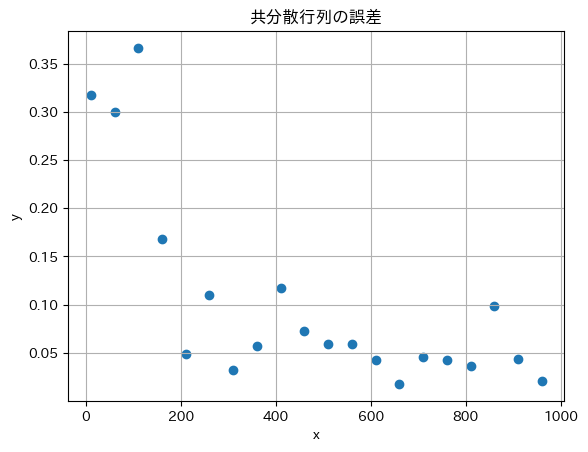

In [ ]:
#可視化
fig = plt.figure()
plt.scatter(sample_li, erros_li)
plt.xlabel('x')
plt.ylabel('y')
plt.title("共分散行列の誤差")
plt.grid()

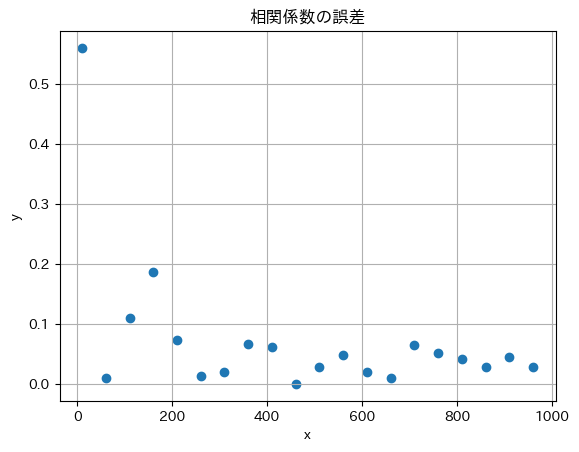

In [ ]:
#標本の確認
fig = plt.figure()
plt.scatter(sample_li, r_erros_li)


plt.xlabel('x')
plt.ylabel('y')
plt.title("相関係数の誤差")
plt.grid()

## 2. 相関係数
Iris データセットには３種のアヤメの特徴量が含まれている．”Species”が”setosa”である
データに限定し，Petal.Length と Petal.Width には相関があるのか検定し，考察せよ．検
定の方法として，講義中に扱った”pearson”と順位相関を計算する”kendall”の両者を用い
よ．なお，kendal については，scipy.stats.kendalltau を用いることで求めることができ
る．

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.loc[df['target'] == 0, 'target'] = "setosa"
df.head(5)

/var/folders/r2/q8_hcldj4f33gjgpcmt2s_yw0000gn/T/ipykernel_42740/2699191940.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'setosa' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['target'] == 0, 'target'] = "setosa"


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 結果

In [ ]:
r, _ = stats.pearsonr(df["petal length (cm)"], df["petal width (cm)"])

data_size = len(df)


t = (np.sqrt(data_size-2)*r)/np.sqrt(1-r**2)
alpha = 0.05
t_cdf = stats.t.ppf(1 - alpha/2,data_size-2)


if abs(t) >= t_cdf:
    print("|{}|>={}:棄却".format(str(t),str(t_cdf)))
 

else:
    print("|{}|<{}:採択".format(str(t),str(t_cdf)))
    


|43.38723738206971|>=1.9761224936033632:棄却
4.6750039073204644e-86


In [24]:
tau, p = stats.kendalltau(df["petal length (cm)"], df["petal width (cm)"])

print("Kendallの順位相関係数:", tau)
print("p値:", p)

# 検定の結果を出力
alpha = 0.025  # 有意水準
if abs(p) >= alpha:
    print("|{}|>={}:棄却".format(str(p),str(alpha)))
else:
    print("|{}|<{}:採択".format(str(p),str(alpha)))

Kendallの順位相関係数: 0.8068906859884751
p値: 2.4434463945331443e-44
|2.4434463945331443e-44|<0.025:採択


Text(0, 0.5, 'petal width (cm)')

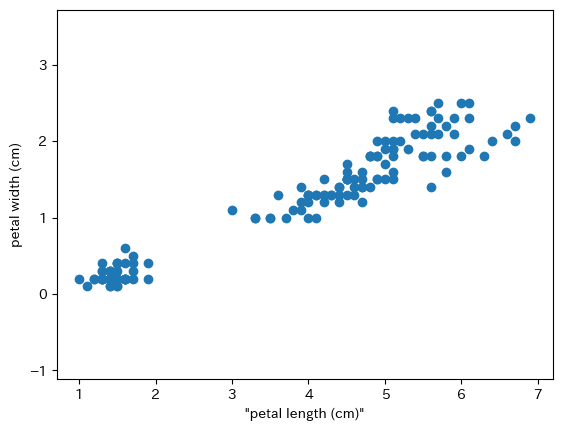

In [30]:
plt.scatter(df["petal length (cm)"], df["petal width (cm)"])
plt.axis('equal')
plt.xlabel('"petal length (cm)"')
plt.ylabel('petal width (cm)')

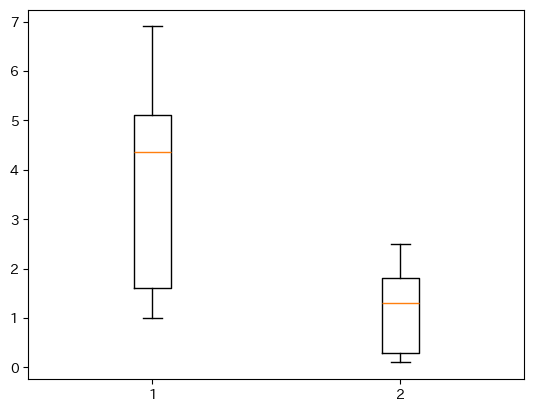

In [32]:
plt.boxplot([df["petal length (cm)"], df["petal width (cm)"]])
plt.show()

### 考察

ピアソンを用いて検定では、棄却される。一方でKendallの順位相関係数では採択される。
理由としては、ケンドールは大小関係を用いているのに対して、ピアソンはここの値を扱っているためサンプル数が少ない場合はサンプリングの仕方に強く影響を受けると考えられる。
外れ値が多かったりサンプル数が少なかったりすると, ロバストなケンドールの方がより厳密と言える。
従って、今回は**採択**が回答となる

## 3.主成分分析

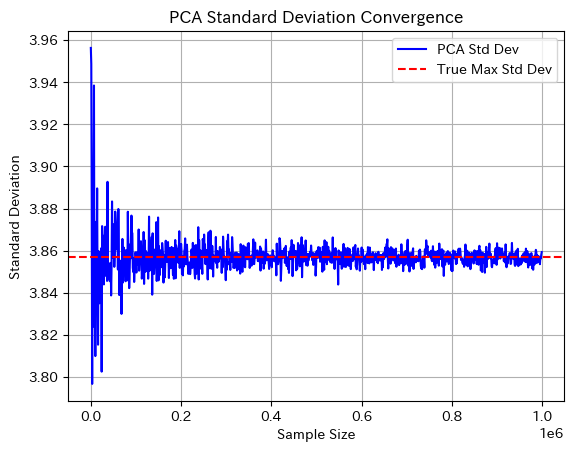

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ設定
n_dimensions = 10  # 次元数
n_samples = 10  # 初期サンプルサイズ
step = 1000  # サンプルサイズの増加ステップ
max_samples = 1000000  # 最大サンプルサイズ

# 共分散行列の設定
np.random.seed(0)
cov_matrix = np.random.rand(n_dimensions, n_dimensions)
cov_matrix = (cov_matrix + cov_matrix.T) / 2  
cov_matrix += n_dimensions * np.eye(n_dimensions)  

# サンプルサイズごとの標準偏差を保存するリスト
sample_sizes = []
pca_std_devs = []
true_std_dev = np.sqrt(np.max(np.linalg.eigvals(cov_matrix)))  # 最大固有値に基づく標準偏差

for n_samples in range(100, max_samples + 1, step):
    # サンプルデータ生成
    samples = np.random.multivariate_normal(mean=np.zeros(n_dimensions), cov=cov_matrix, size=n_samples)

    # 共分散行列の計算
    sample_cov = np.cov(samples, rowvar=False)

    # 固有値分解
    eigenvalues, eigenvectors = np.linalg.eig(sample_cov)

    # 第一主成分の標準偏差を計算
    first_pc_index = np.argmax(eigenvalues)  # 最大固有値のインデックス
    first_pc_vector = eigenvectors[:, first_pc_index]  # 第一主成分ベクトル

    # 第一主成分スコアの計算
    pc_scores = samples @ first_pc_vector

    # 標準偏差を計算
    pca_std_dev = np.std(pc_scores)

    # 結果を記録
    sample_sizes.append(n_samples)
    pca_std_devs.append(pca_std_dev)

# 結果のプロット
plt.plot(sample_sizes, pca_std_devs, label='PCA Std Dev', color='blue')
plt.axhline(y=true_std_dev, color='red', linestyle='--', label='True Max Std Dev')
plt.xlabel('Sample Size')
plt.ylabel('Standard Deviation')
plt.title('PCA Standard Deviation Convergence')
plt.legend()
plt.grid()
plt.show()


### 考察

図のようにサンプルサイズを大きくするにつれて、母集団分布の最大となる方向の標準偏差に漸近する。  
理由としては、大数の法則に基づいていると考えられる。  
サンプル数が増えるとサンプルからの推定値が母集団の真の値に収束する。  
そのため、サンプルの共分散行列も母集団共分散行列に収束する。
これによって、第一主成分もそれに従って変化し、最終的に母集団の最大分散の方向を反映する。


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# パラメータ設定
n_dimensions = 10  # 次元数
n_samples = 10  # 初期サンプルサイズ
step = 1000  # サンプルサイズの増加ステップ
max_samples = 1000000  # 最大サンプルサイズ

# 共分散行列の設定
np.random.seed(0)
cov_matrix = np.random.rand(n_dimensions, n_dimensions)
cov_matrix = (cov_matrix + cov_matrix.T) / 2  
cov_matrix += n_dimensions * np.eye(n_dimensions)  

# サンプルサイズごとの標準偏差を保存するリスト
sample_sizes = []
pca_std_devs = []
true_std_dev = np.sqrt(np.max(np.linalg.eigvals(cov_matrix)))  # 最大固有値に基づく標準偏差

for n_samples in range(100, max_samples + 1, step):
    # サンプルデータ生成
    samples = np.random.multivariate_normal(mean=np.zeros(n_dimensions), cov=cov_matrix, size=n_samples)
    transoformer = PCA(n_components=4)
    pca = transoformer.fit_transform(samples)



    pca_std_dev = np.std(pca, axis=0)

    # 結果を記録
    sample_sizes.append(n_samples)
    pca_std_devs.append(pca_std_dev)

# 結果のプロット
plt.plot(sample_sizes, pca_std_devs, label='PCA Std Dev', color='blue')
plt.axhline(y=true_std_dev, color='red', linestyle='--', label='True Max Std Dev')
plt.xlabel('Sample Size')
plt.ylabel('Standard Deviation')
plt.title('PCA Standard Deviation Convergence')
plt.legend()
plt.grid()
plt.show()
